# Analysis of Wilson loop means
## Import
### Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
from tqdm import tqdm_notebook
sns.set_style("whitegrid")

### Data

In [2]:
PATH = '../Output/'
LATTICE = 0.07261

In [3]:
data = pd.DataFrame()
for i, result in tqdm_notebook(enumerate(glob.glob(f'{PATH}*.csv'))):
    if i == 0:
        data = pd.read_csv(result, names=['R', 'T', f'W_{i}'], header=0)
    else:
        try:
            data[f'W_{i}'] = pd.read_csv(result, usecols=['Mean'])['Mean'].values.astype(np.float64)
        except pd.io.common.EmptyDataError:
            print(f'{result} is empty')

In [4]:
data.head()

,R,T,W_0,W_1,W_2,W_3,W_4,W_5,W_6,W_7,...,W_1188,W_1189,W_1190,W_1191,W_1192,W_1193,W_1194,W_1195,W_1196,W_1197
0,1,1,0.613560,0.613959,0.613275,0.613808,0.613631,0.613537,0.613167,0.613900,...,0.613690,0.613591,0.613585,0.613649,0.613717,0.613451,0.613437,0.613915,0.613351,0.613505
1,1,2,0.409911,0.410461,0.409703,0.410416,0.410150,0.409856,0.409397,0.410446,...,0.410184,0.410058,0.410171,0.410248,0.410311,0.409828,0.409828,0.410582,0.409727,0.409729
2,1,3,0.279356,0.279484,0.279000,0.279669,0.279552,0.278891,0.278667,0.279776,...,0.279634,0.279190,0.279149,0.279673,0.279516,0.279057,0.279065,0.280007,0.278934,0.279259
3,1,4,0.191373,0.191344,0.190679,0.191419,0.191312,0.190734,0.190461,0.191578,...,0.191384,0.191081,0.190787,0.191548,0.191405,0.190891,0.191026,0.191853,0.190914,0.191084
4,1,5,0.131250,0.131045,0.130499,0.131409,0.131236,0.130549,0.130433,0.131363,...,0.131350,0.130820,0.130403,0.131345,0.131146,0.130592,0.130845,0.131843,0.130720,0.131004


In [5]:
split = [y for y in data.columns if 'W_' in y]
for i, config in enumerate(split):
    vr = []
    for r in range(1, np.max(data['R'])+1):
        w = data.loc[data.R == r, f'W_{i}'].values
        vr += list(np.log([w[j]/w[j+1] for j in range(len(w)-1)])) + [-1]
    data[f'V_{i}'] = vr
data['Ws'] = list(data[split].values)
data.drop(columns=split, inplace=True)

/Users/giles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [6]:
data.head()

,R,T,V_0,V_1,V_2,V_3,V_4,V_5,V_6,V_7,...,V_1189,V_1190,V_1191,V_1192,V_1193,V_1194,V_1195,V_1196,V_1197,Ws
0,1,1,0.403338,0.402647,0.403381,0.402512,0.402873,0.403434,0.403951,0.402589,...,0.403030,0.402744,0.402663,0.402619,0.403364,0.403341,0.402279,0.403447,0.403691,"[0.6135603584902187, 0.6139586458739509, 0.613..."
1,1,2,0.383453,0.384336,0.384221,0.383564,0.383334,0.384985,0.384670,0.383256,...,0.384408,0.384829,0.383141,0.383855,0.384319,0.384293,0.382762,0.384515,0.383359,"[0.40991116125299426, 0.41046093807485695, 0.4..."
2,1,3,0.378263,0.378873,0.380618,0.379141,0.379285,0.379940,0.380567,0.378691,...,0.379196,0.380589,0.378481,0.378669,0.379715,0.379034,0.378087,0.379151,0.379425,"[0.27935612624294087, 0.27948380090379166, 0.2..."
3,1,4,0.377118,0.378531,0.379225,0.376150,0.376904,0.379136,0.378593,0.377334,...,0.378872,0.380526,0.377313,0.378076,0.379626,0.378399,0.375116,0.378765,0.377488,"[0.19137300813530628, 0.19134361713074852, 0.1..."
4,1,5,0.375300,0.377729,0.378940,0.376165,0.377589,0.379392,0.378493,0.376033,...,0.378071,0.380354,0.377297,0.377181,0.380582,0.378459,0.374168,0.376632,0.378271,"[0.13125038623135982, 0.13104489086953636, 0.1..."


In [7]:
split = [y for y in data.columns if 'V_' in y]
data['Vs'] = list(data[split].values)
data.drop(columns=split, inplace=True)

In [8]:
data.head()

,R,T,Ws,Vs
0,1,1,"[0.6135603584902187, 0.6139586458739509, 0.613...","[0.40333818680959715, 0.40264680646039974, 0.4..."
1,1,2,"[0.40991116125299426, 0.41046093807485695, 0.4...","[0.38345305033562893, 0.3843364339165198, 0.38..."
2,1,3,"[0.27935612624294087, 0.27948380090379166, 0.2...","[0.3782629602658829, 0.3788734792279575, 0.380..."
3,1,4,"[0.19137300813530628, 0.19134361713074852, 0.1...","[0.37711760156509533, 0.37853091138346695, 0.3..."
4,1,5,"[0.13125038623135982, 0.13104489086953636, 0.1...","[0.3752997827758688, 0.3777293903018428, 0.378..."


## Jackknife

In [9]:
def jackknife(in_vals):
    vals_sum = np.sum(in_vals)
    if vals_sum != vals_sum: #Contains NaNs
        vals = [i for i in in_vals if i == i]
        vals_sum = np.sum(vals)
        
    else:
        vals = in_vals
        
    jk = np.zeros_like(vals)
    n = len(vals)
    
    for i in range(n):
        jk[i] = (vals_sum-vals[i])
    jk /= n-1
    
    mean = np.mean(jk)
    std = np.sqrt((len(jk)-1)*np.sum((jk-mean)**2)/len(jk))
    return mean, std

In [10]:
jk_means = data.apply(lambda row: jackknife(row['Ws']), axis=1)
data['Mean_W'] = [x[0] for x in jk_means]
data['Std_W'] = [x[1] for x in jk_means] 

jk_means = data.apply(lambda row: jackknife(row['Vs']), axis=1)
data['Mean_V'] = [x[0] for x in jk_means]
data['Std_V'] = [x[1] for x in jk_means] 

## Plotting
### W(R,T)

In [11]:
def uncertRound(value, uncert):
    if uncert == 0:
        return value, uncert
    
    factor = 1.0
    while uncert/factor > 1:
        factor *= 10.0
    
    value /= factor
    uncert /= factor
        
    i = 0    
    while uncert*(10**i) <= 1:
        i += 1
    
    roundUncert = factor*round(uncert, i)
    roundValue = factor*round(value, i)
    if int(roundUncert) == roundUncert:
        roundUncert = int(roundUncert)
        roundValue = int(roundValue)
    return roundValue, roundUncert

In [12]:
uncertRound(123.80809808, 0.234234)

(123.8, 0.2)

In [13]:
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

In [14]:
def plotW(data, logy=False):
    fits = {}
    
    with sns.color_palette('tab20', len(set(data['R']))):
        fig = plt.figure(figsize=(16,8))
        for i, r in enumerate(list(set(data['R']))):
            #Scatter
            x = data.loc[data.R == r, 'T']
            y = data.loc[data.R == r, 'Mean_W']
            err = data.loc[data.R == r, 'Std_W']
            plt.errorbar(x, y, yerr=err, fmt='o', color=sns.color_palette()[i], label='')
            
            #Exp fit
            fit, conv = curve_fit(exponenial_func, x, y, p0=(0.5, 1, 0.001), sigma=err)
            xx = np.linspace(np.min(x), np.max(x), 1000)
            yy = exponenial_func(xx, *fit)
            fits[r] = (fit, conv)
            
            #Uncertainty
            coef = []
            unc = np.sqrt(np.diag(conv))
            for j in range(len(fit)):
                coef.append(uncertRound(fit[j], unc[j]))
                
            plt.plot(xx, yy, color=sns.color_palette()[i],
                     label='W({},T) = {}±{} x exp({}±{} x T) + {}±{}'.format(r,
                                                                             coef[0][0], coef[0][1],
                                                                             coef[1][0], coef[1][1],
                                                                             coef[2][0], coef[2][1],))

        plt.legend(loc='best', fontsize=16)
        plt.xticks(fontsize=16, color='black')
        plt.yticks(fontsize=16, color='black')
        plt.ylabel("W(R,T)", fontsize=24, color='black')
        plt.xlabel('T', fontsize=24, color='black')
        if logy: plt.yscale('log')
        plt.show()
    return fits

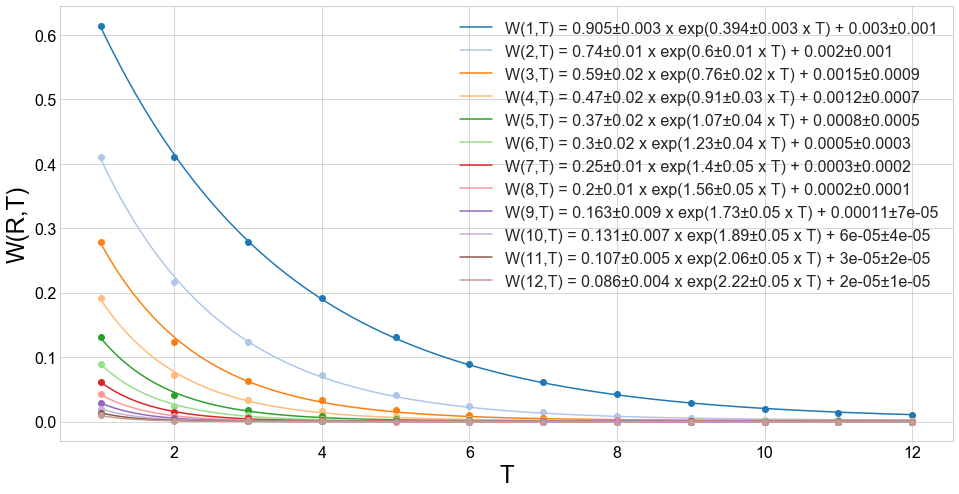

In [15]:
expFits = plotW(data)

### V(R)

In [16]:
def const_func(x, a):
    return np.ones_like(x)*a

In [17]:
t_ranges = {#1:(5, 12),
            2:(6, 10),
            3:(5, 9),
            4:(5, 8),
            5:(5, 9),
            #6:(4, 8)
            }

In [18]:
def plotV(data):
    palette = 'tab20'
    if len(t_ranges) < 10:
        palette = 'tab10'
    with sns.color_palette(palette, len(t_ranges)):
        
        fits = {}
        for i, r in enumerate(t_ranges):
            fig = plt.figure(figsize=(16,8))

            #scatter
            cut = (data.R == r) & (data['T'] >= t_ranges[r][0]) & (data['T'] <= t_ranges[r][1]) 
            x = data.loc[cut, 'T'].values[:-1]
            y = data.loc[cut, 'Mean_V'].values[:-1]*1000
            err = data.loc[cut, 'Std_V'].values[:-1]*1000

            plt.errorbar(x, y, yerr=err, fmt='o', color=sns.color_palette()[i], label='')

            #constant fit
            fit, conv = curve_fit(const_func, x, y, p0=(0.5), sigma=err)
            xx = np.linspace(np.min(x), np.max(x), 1000)
            yy = const_func(xx, *fit)
            coef = uncertRound(fit[0], np.sqrt(np.diag(conv))[0])
            
            #Chi2
            chi = (y - const_func(x, *fit)) / err
            chi2 = (chi**2).sum()
            dof = len(x) - len(fit)
            red_chi2 = (chi2 / dof)
            
            plt.plot(xx, yy, label=r'$V(' + '{:.5f}'.format(r*LATTICE) + r')=' + str(coef[0]) + r'\pm' + str(coef[1]) + \
                     r'\ [MeV],\ \ \ \frac{\chi^2}{N_\mathrm{dof}}=$' + '{:.2f}'.format(red_chi2),
                     color=sns.color_palette()[i])
            
            unc = np.sqrt(np.diag(conv))
            fits[r] = (fit[0], unc)

            plt.legend(loc='best', fontsize=16)
            plt.xticks(fontsize=16, color='black')
            plt.yticks(fontsize=16, color='black')
            plt.ylabel(r"$V(" + '{:.5f}'.format(r*LATTICE) + r"\,fm)\ [MeV]$", fontsize=24, color='black')
            plt.xlabel('T', fontsize=24, color='black')
            #plt.yscale('log')
            plt.show()

    return fits

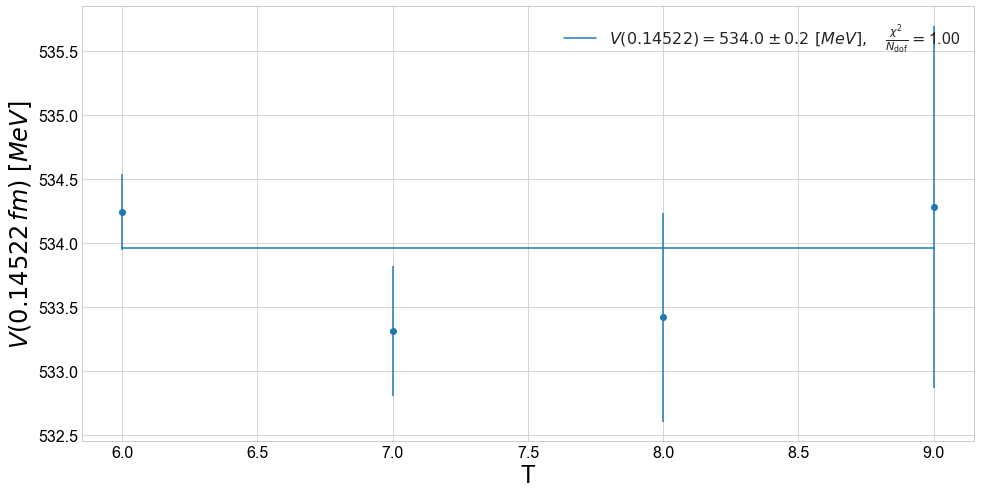

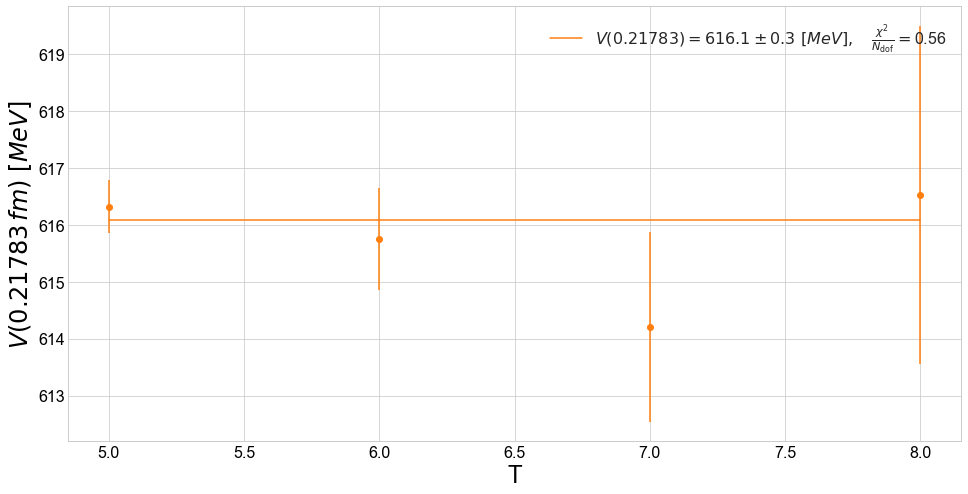

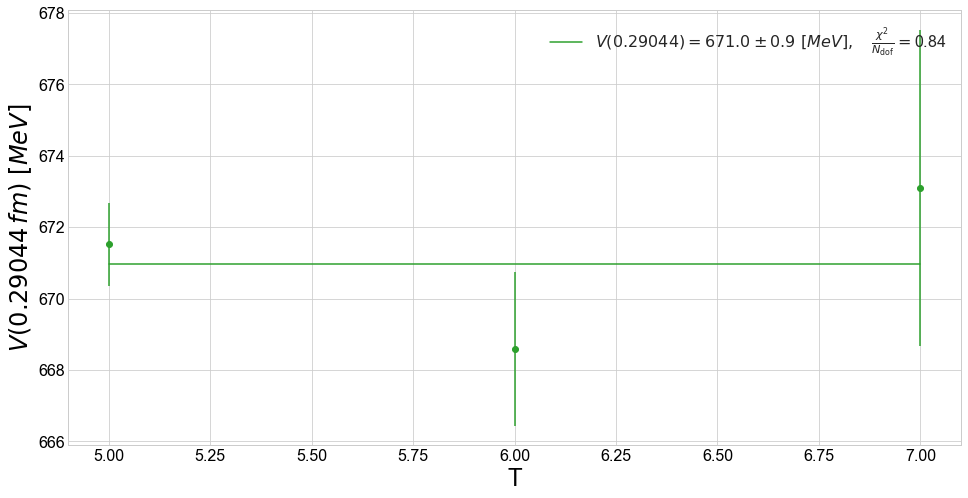

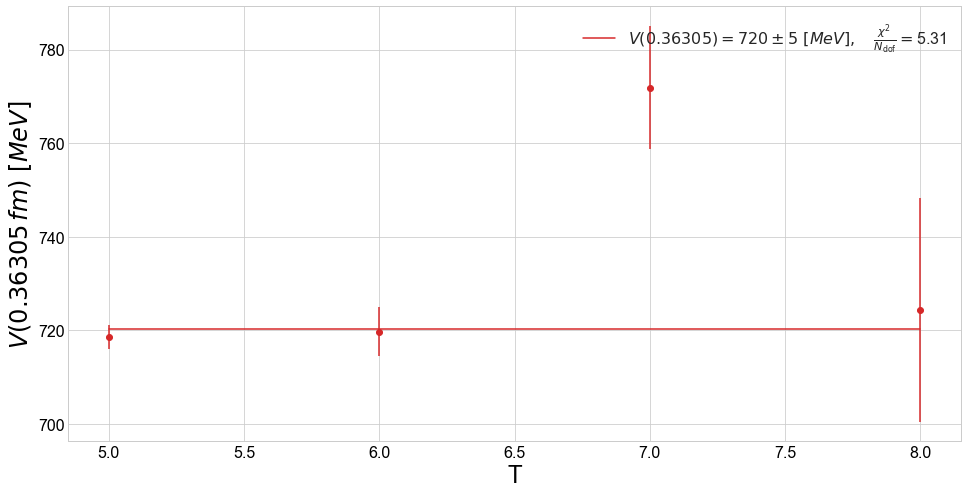

In [19]:
constFits = plotV(data)

In [20]:
def funnel_func(x, a, b, c):
    return (a/x) + b + (c*x)

In [21]:
def plotVR(fits):
    x = np.array([r for r in fits])*LATTICE
    coefs = np.array([(fits[r][0], fits[r][1]) for r in fits])
    
    fig = plt.figure(figsize=(16,8))
    plt.errorbar(x, coefs[:,0], yerr=coefs[:,1], fmt='o', label='', color=sns.color_palette()[0])
    
    #Funnel fit
    fit, conv = curve_fit(funnel_func, x, coefs[:,0], p0=(0.1, 0.4, 0.1), sigma=coefs[:,1])
    xx = np.linspace(np.min(x), np.max(x), 1000)
    yy = funnel_func(xx, *fit)
    
    #Uncertainty
    coef = []
    unc = np.sqrt(np.diag(conv))
    for j in range(len(fit)):
        coef.append(uncertRound(fit[j], unc[j]))
        
    #Chi2
    chi = (coefs[:,0] - funnel_func(x, *fit)) / coefs[:,1]
    chi2 = (chi**2).sum()
    dof = len(x) - len(fit)
    red_chi2 = (chi2 / dof)

    plt.plot(xx, yy, color=sns.color_palette()[0],
             label=r'$V(R)\ /\ MeV = ' + str(coef[0][0]) + r'\pm' + str(coef[0][1]) + r'\times\frac{1}{r} + ' \
                   + str(coef[1][0]) + r'\pm' + str(coef[1][1]) \
                   + r'+' + str(coef[2][0]) + r'\pm' + str(coef[2][1]) \
                   + r'\times r,\ \ \ \frac{\chi^2}{N_\mathrm{dof}}=$' + '{:.2f}'.format(red_chi2))
    
    plt.legend(loc='best', fontsize=16)
    plt.xticks(fontsize=16, color='black')
    plt.yticks(fontsize=16, color='black')
    plt.ylabel(r"$V(r)\ [MeV]$", fontsize=24, color='black')
    plt.xlabel(r"$r\ [fm]$", fontsize=24, color='black')
    plt.show()

    return fit, conv

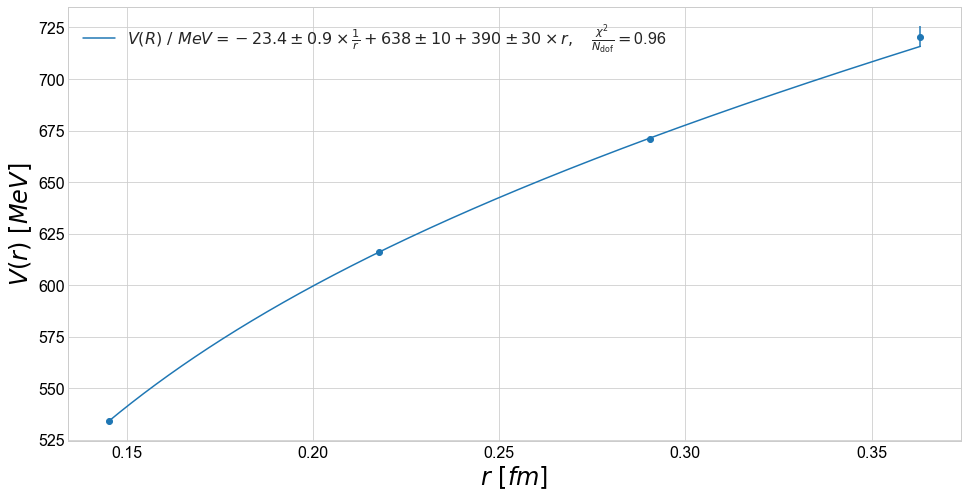

In [22]:
fit, conv = plotVR(constFits)